In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras import layers
from keras.layers.normalization import BatchNormalization
import keras
import dlib
import cv2
from sklearn import preprocessing
from imutils import face_utils
import numpy as np
from keras.optimizers import SGD,Adam
from keras.layers import UpSampling2D
from tensorflow.keras import Model

from tensorflow.keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from numpy.random import seed
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
X_train = np.load('/content/drive/MyDrive/DATASETS/X_train_KDEF_224.npy')
y_train = np.load('/content/drive/MyDrive/DATASETS/y_train_KDEF_224.npy')

In [ ]:
print(X_train.shape)

(1213, 224, 224, 3)


In [ ]:
X_test = np.load('/content/drive/MyDrive/DATASETS/X_test_KDEF_224.npy')
y_test = np.load('/content/drive/MyDrive/DATASETS/y_test_KDEF_224.npy')

5


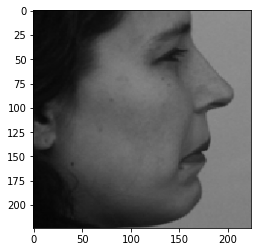

In [ ]:
import matplotlib.pyplot as plt
print(y_train[200])
##print(le.inverse_transform(y_train_KDEF[200]))
plt.imshow(X_train[200])
plt.show()

In [ ]:
x_train_data = X_train
print(x_train_data.shape)
y_train_data = to_categorical(y_train, 7)
print(y_train_data.shape)
x_test_data = X_test
print(x_test_data.shape)
y_test_data = to_categorical(y_test, 7)
print(y_test_data.shape)

(1213, 224, 224, 3)
(1213, 7)
(1210, 224, 224, 3)
(1210, 7)


In [ ]:
from sklearn.model_selection import train_test_split
x_train_final, x_valid_final, y_train_final, y_valid_final = train_test_split(x_train_data, y_train_data, test_size=0.1, random_state=42)

In [ ]:
y_valid_final.shape

(122, 7)

In [ ]:
num_features=64
# define the model
model = Sequential()

    # 1st stage
model.add(Conv2D(num_features, kernel_size=(3, 3), input_shape=(224,224,3)))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(Conv2D(num_features, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(Dropout(0.5))

    # 2nd stage
model.add(Conv2D(num_features, (3, 3), activation='relu'))
model.add(Conv2D(num_features, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # 3rd stage
model.add(Conv2D(2 * num_features, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(Conv2D(2 * num_features, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))




model.add(Flatten())

    # Fully connected neural networks

model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(7, activation='softmax'))
model.summary()

ResourceExhaustedError: ignored

In [ ]:

#sgd = SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
#model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
#callbacks = [ModelCheckpoint(weights, monitor='val_loss', save_best_only=True, verbose=0)]
adam=Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss='categorical_crossentropy',optimizer = adam, metrics=['accuracy'])
checkpoint_filepath = '/content/drive/MyDrive/DATASETS/frustration.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    verbose=1,

    save_best_only=True)
#model.fit(x_train_data,y_train_data,batch_size = 64,epochs=100)
history = model.fit(x_train_final , y_train_final, batch_size=64,epochs=100,validation_data=(x_valid_final, y_valid_final),verbose=1, use_multiprocessing=True,callbacks=[model_checkpoint_callback])

#model.fit(X_train, Y_train, batch_size = 1000, nb_epoch = 5, verbose = 1, shuffle = True)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100


ResourceExhaustedError: ignored

In [ ]:
import matplotlib.pyplot as plt



def plot_accuracy_loss(history):
    fig = plt.figure(figsize=(10,5))
    plt.subplot(221)
    plt.plot(history.history['accuracy'], label = "acc")
    plt.plot(history.history['val_accuracy'], label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()
    plt.subplot(222)
    plt.plot(history.history['loss'] ,label = "loss")
    plt.plot(history.history['val_loss'], label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")
    plt.legend()
    plt.show()

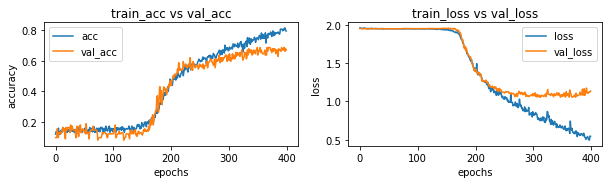

In [ ]:
plot_accuracy_loss(history)

In [ ]:
from sklearn.metrics import classification_report
from keras.models import Sequential, load_model

#model=load_model('/content/drive/MyDrive/DATASETS/test2_48.h5')
#model.summary()
predicted = model.predict(x_test_data)
pred_labels = np.argmax(predicted, axis = 1)
report = classification_report(y_test, pred_labels)
print(report)

              precision    recall  f1-score   support

           0       0.30      0.39      0.34       174
           1       0.50      0.58      0.54       172
           2       0.70      0.40      0.51       171
           3       0.68      0.84      0.75       175
           4       0.47      0.49      0.48       174
           5       0.47      0.22      0.30       175
           6       0.55      0.69      0.61       172

    accuracy                           0.52      1213
   macro avg       0.53      0.52      0.50      1213
weighted avg       0.53      0.52      0.50      1213



In [ ]:

from ann_visualizer.visualize import ann_viz;

ann_viz(model, title="My first neural network")

ModuleNotFoundError: ignored

In [ ]:
!pip install ann_visualizer

In [ ]:
from sklearn.metrics import classification_report
from keras.models import Sequential, load_model
model=load_model('/content/drive/MyDrive/emotion_model.hdf5')
model.summary()
predicted = model.predict(x_test_data)
pred_labels = np.argmax(predicted, axis = 1)
report = classification_report(y_test, pred_labels)
print(report)

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 62, 62, 8)    72          input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 62, 62, 8)    32          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 62, 62, 8)    0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

ValueError: ignored

In [ ]:
%tensorboard --logdir logs/fit